Output()

Output()

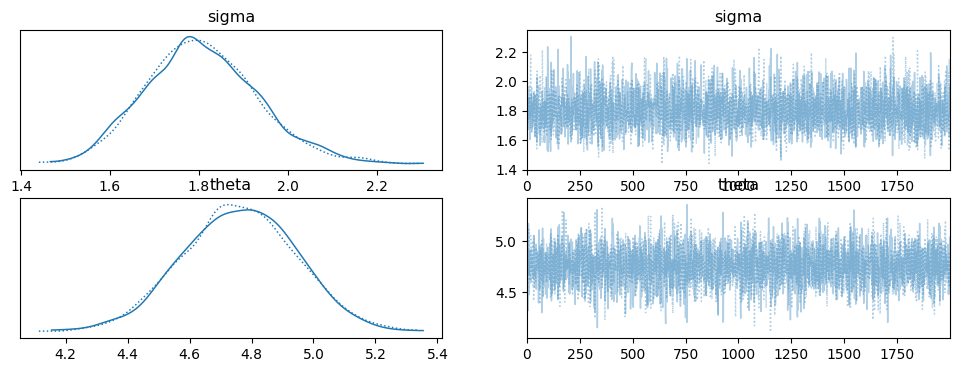

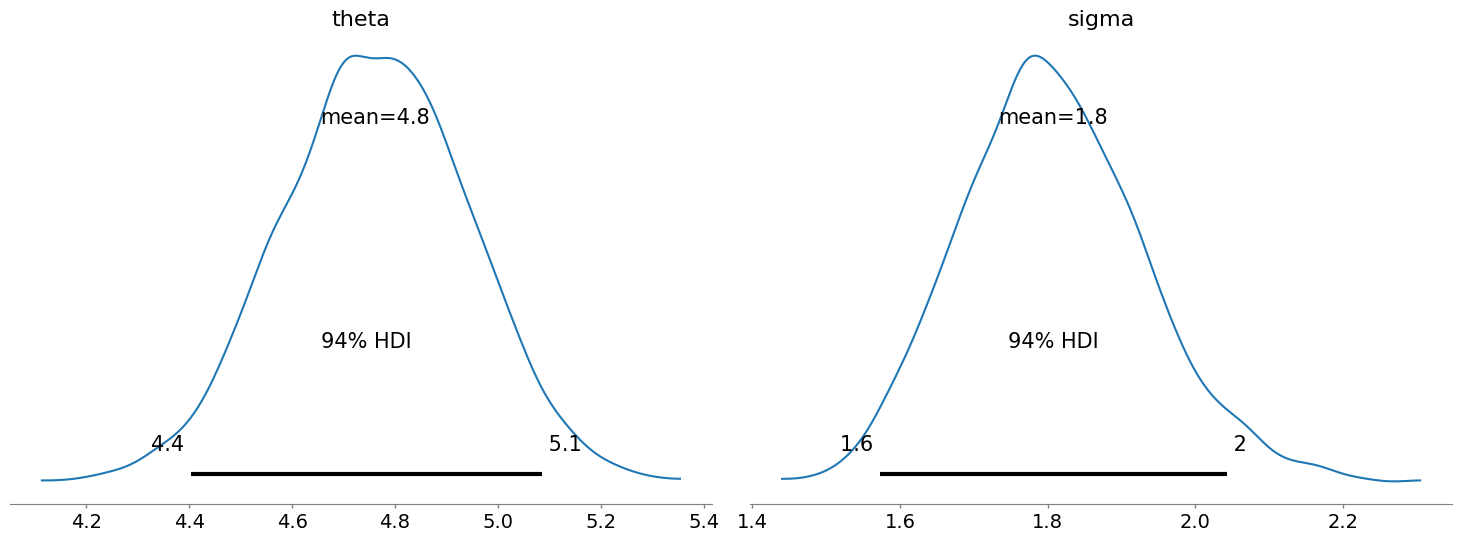

        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
sigma  1.807  0.125   1.573    2.043      0.002    0.001    3947.0    3077.0   
theta  4.760  0.183   4.403    5.085      0.003    0.002    3628.0    2207.0   

       r_hat  
sigma    1.0  
theta    1.0  


In [3]:
#Q@
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

# Generate simulated data
np.random.seed(42)
n = 100
theta_true = 5
sigma_true = 2
data = np.random.normal(theta_true, sigma_true, size=n)

with pm.Model() as bayesian_model:
    # Prior distributions
    theta = pm.Laplace('theta', mu=0, b=1)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Likelihood function
    observations = pm.Normal('obs', mu=theta, sigma=sigma, observed=data)

    # Sampling from the posterior
    trace = pm.sample(2000, return_inferencedata=True)

# Trace and posterior plots
az.plot_trace(trace)
plt.show()

az.plot_posterior(trace, var_names=["theta", "sigma"], hdi_prob=0.94)
plt.tight_layout()
plt.show()

# Summary statistics
print(az.summary(trace))

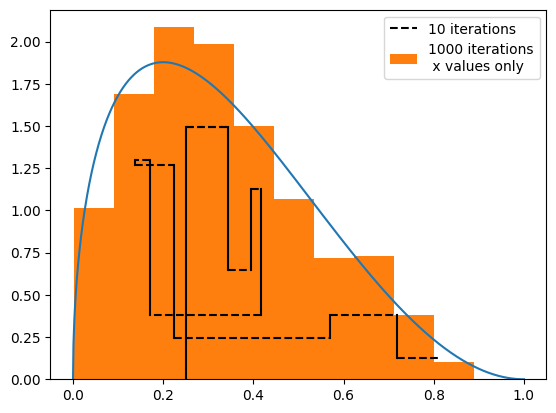

In [2]:
#Q3
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def slice_f_at_y(f, x, y, x_grid=np.linspace(0,1,51)):

    # find interval of grid points where f(x_grid) > y
    # then extend the enterval so endpoints f(a)<y and f(b)<y
    x_grid_delta = x_grid[1]-x_grid[0]
    a,b = x_grid[f(x_grid)>y][[0,-1]]+[-x_grid_delta,x_grid_delta]
    # a,b = x_grid[0,-1]  # make the interval all of x_grid

    x_ = a + stats.uniform().rvs()*(b-a)
    if f(x_)>y:
        return x_,1  # in 1 try if f(x_)>y and "x_ is under f"
    elif x_ < x:  # or if "x_ was above f on the left side of the interval"
        x_l,x_r = x_,b
    else:
        x_l,x_r = a,x_  # or if "x_ was above f on the right side of the interval"
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = 2)  # try again with a reduced interval

def slice_f_at_y_(f, x, y, x_l=0, x_r=1, tot=1):

    x_ = x_l + stats.uniform().rvs()*(x_r-x_l)

    if f(x_)>y:
        return x_,tot
    elif x_ < x:
        x_l = x_
    else:
        x_r = x_
    return slice_f_at_y_(f, x, y, x_l, x_r, tot = tot+1)
x_grid = np.linspace(0,1,1000)
f = lambda x: stats.beta(1.5,3).pdf(x)
plt.plot(x_grid, f(x_grid))

m = 1000
x = np.zeros([m+1,3])
x[:2,0] = 0.25

plot_trace = 10
for t in range(1,m):

    x[t,1] = stats.uniform().rvs()*f(x[t,0])
    if t < plot_trace:
        plt.plot([x[t,0]]*2, [x[t-1,1],x[t,1]], 'k')

    x[t+1,0],x[t+1,2] = slice_f_at_y(f, x[t,0], x[t,1])
    if t < plot_trace:
        if t==1:
            plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--', label=str(plot_trace)+ " iterations")
        plt.plot([x[t,0], x[t+1,0]], [x[t,1]]*2, 'k--')

plt.hist(x[:,0], density=True, label=str(m)+" iterations\n x values only")
plt.legend();

- Slice sampling provides an adaptive way to sample from complex
distributions without requiring tuning of proposal distributions, making it a useful alternative to Metropolis-Hastings within Gibbs sampling. By iteratively refining the sampling interval based on function evaluations, it ensures efficient exploration of the probability space.
- In Gibbs sampling, where full conditional distributions may not be explicitly normalized, slice sampling offers a robust method for generating new values while maintaining convergence properties. The visualized histogram confirms that the sampling process effectively captures the target distribution.







